**Modelado y ETL para Departamento de Compras de una empresa**

**ANÁLISIS DEL SISTEMA DE BI REQUERIDO POR EL CLIENTE**

El cliente quiere tomar decisiones sobre dos partes diferenciadas: la parte financiera y la parte de análisis de los proveedores. Por lo tanto hay que hacer 2 análisis por separado, uno para cada parte.

Primero quiero analizar todas las fuentes de datos proporcionadas por el cliente para ir familiarizándome con ellas.


**CARGA Y LIMPIEZA DE DATOS**

Importo las librerías necesarias

In [9]:
import os
import pandas as pd

Cargo las fuentes de  datos proporcionados para su análisis. He abierto previamente los archivos csv y he visto que todos ellos tenían una sola columna con valores delimitados por un punto y coma así que  añado el delimitador sea un punto y coma cuando los cargo.

In [10]:
os.chdir(r"/content/sample_data/")
df_daily_currencies = pd.read_csv("daily_currencies.csv", delimiter=";")
df_invoices_header=pd.read_csv("invoices_header.csv", delimiter=";")
df_invoices_products=pd.read_csv("invoices_products.csv", delimiter=";")
df_products=pd.read_csv("products.csv", delimiter=";")
df_suppliers=pd.read_csv("suppliers.csv", delimiter=";")
#df_purchase_budget=pd.read_excel("purchase_budget.xls")


Visualizo las cabeceras de los datos para ver si se han cargado bien

In [4]:
df_daily_currencies.head()

,Date,Open,High,Low,Close,Currency
0,2022-03-28,1.0984,1.1000,1.0944,1.0987,USD
1,2022-03-25,1.0998,1.1039,1.0980,1.0981,USD
2,2022-03-24,1.1004,1.1015,1.0970,1.0997,USD
3,2022-03-23,1.1029,1.1044,1.0964,1.1005,USD
4,2022-03-22,1.1018,1.1046,1.0960,1.1030,USD


In [5]:
df_invoices_header.head()

,Invoice,InboundDate,Supplier,OrderDate,InvoiceDate
0,FFCC141196,2014-05-26,PROV1650,2014-05-10,2014-05-29
1,FFCC141197,2014-05-20,PROV40000235,2014-04-13,2014-05-23
2,FFCC141198,2014-05-12,PROV1647,2014-04-27,2014-05-15
3,FFCC141199,2014-05-19,PROV40001000,2014-03-24,2014-05-22
4,FFCC141200,2014-05-24,PROV40000850,2014-05-11,2014-05-27


In [6]:
df_invoices_products.head()

,Invoice,Quantity,Product,PurchasePrice (Unit),Section
0,FFCC141196,1031,MP04245,0.441840,Seccion A
1,FFCC141197,1931,MP04227,1.680570,Seccion D
2,FFCC141198,360,MP02868,1.159200,Seccion D
3,FFCC141198,240,MP02869,1.214400,Seccion E
4,FFCC141199,18138,MP02700,0.124391,Seccion E


In [7]:
df_products.head()

,Product,Type,Division,Group,ShortDescription,Description
0,NaN,Tipo 11178,Division 3,Grupo 2,Texto Search Descripcion 12,Texto Descripcion 15
1,DE0001,Tipo 3,Division 3,Grupo 2,Texto Search Descripcion 8,Texto Descripcion 12
2,DE0002,Tipo 3,Division 3,Grupo 2,Texto Search Descripcion 8,Texto Descripcion 12
3,DE0003,Tipo 3,Division 3,Grupo 2,Texto Search Descripcion 8,Texto Descripcion 12
4,DE0004,Tipo 3,Division 3,Grupo 2,Texto Search Descripcion 8,Texto Descripcion 12


In [8]:
df_suppliers.head()

,SupplierName,PaymentMethod,PaymentTerms,IDSupplier,Country,Currency
0,Proveedor 3,RECIBO,1X30,PROV41000270,ES,EUR
1,Proveedor 4,RECIBO,1X60,PROV1344,ES,EUR
2,Proveedor 12,RECIBO,1X85,PROV40000010,ES,EUR
3,Proveedor 13,RECIBO,1X60,PROV40000187,ES,EUR
4,Proveedor 14,RECIBO,1X60,PROV40000200,ES,EUR


Reviso si hay valores nulos en cada una de nuestras fuentes de datos

DATAFRAME DAILY_CURRENCIES

In [11]:
df_daily_currencies.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Currency,0


In [12]:
df_daily_currencies.shape

(2149, 6)

In [13]:
df_daily_currencies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2149 non-null   object 
 1   Open      2149 non-null   float64
 2   High      2149 non-null   float64
 3   Low       2149 non-null   float64
 4   Close     2149 non-null   float64
 5   Currency  2149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 100.9+ KB


El DataFrame de **daily_currencies** no tiene valores nulos.


Este DataFrame tiene una columna de "Date" que hay que cambiar a formato DateTime

In [14]:
df_daily_currencies['Date'] = pd.to_datetime(df_daily_currencies['Date'])

In [15]:
df_daily_currencies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2149 non-null   datetime64[ns]
 1   Open      2149 non-null   float64       
 2   High      2149 non-null   float64       
 3   Low       2149 non-null   float64       
 4   Close     2149 non-null   float64       
 5   Currency  2149 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 100.9+ KB


Quito las columnas de "High","Open" y "Low" y me quedo sólo con la columna "Close", ya que es el valor que voy a utilizar.Además voy a cambiarle el nombre a "Tipo_cambio" (EUR-USD)

In [16]:
df_daily_currencies=df_daily_currencies.drop(["Open", "High", "Low"], axis=1)
df_daily_currencies=df_daily_currencies.rename(columns={"Close": "Tipo_cambio"})

In [18]:
df_daily_currencies.head()

,Date,Tipo_cambio,Currency
0,2022-03-28,1.0987,USD
1,2022-03-25,1.0981,USD
2,2022-03-24,1.0997,USD
3,2022-03-23,1.1005,USD
4,2022-03-22,1.1030,USD


DATAFRAME INVOICES HEADER

In [19]:
df_invoices_header.isnull().sum()

,0
Invoice,0
InboundDate,0
Supplier,0
OrderDate,0
InvoiceDate,0


In [20]:
df_invoices_header.shape

(5178, 5)

In [21]:
df_invoices_header.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5178 entries, 0 to 5177
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Invoice      5178 non-null   object
 1   InboundDate  5178 non-null   object
 2   Supplier     5178 non-null   object
 3   OrderDate    5178 non-null   object
 4   InvoiceDate  5178 non-null   object
dtypes: object(5)
memory usage: 202.4+ KB


El DataFrame de **invoices_header** no tiene valores nulos.


Este DataFrame tiene varias columnas de fechas, por lo que hay que convertirlas a formato DateTime

In [57]:
df_invoices_header["InboundDate"] = pd.to_datetime(df_invoices_header["InboundDate"])
df_invoices_header["OrderDate"] = pd.to_datetime(df_invoices_header["OrderDate"])
df_invoices_header["InvoiceDate"] = pd.to_datetime(df_invoices_header["InvoiceDate"])

In [22]:
df_invoices_header.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5178 entries, 0 to 5177
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Invoice      5178 non-null   object
 1   InboundDate  5178 non-null   object
 2   Supplier     5178 non-null   object
 3   OrderDate    5178 non-null   object
 4   InvoiceDate  5178 non-null   object
dtypes: object(5)
memory usage: 202.4+ KB


Voy a cambiar el nombre de la columna "Supplier" por "IDSupplier" ya que en el DF de "Suppliers" tiene ese nombre

In [23]:
df_invoices_header = df_invoices_header.rename(columns={"Supplier": "IDSupplier"})

DATAFRAME INVOICES_PRODUCTS

In [24]:
df_invoices_products.isnull().sum()

,0
Invoice,0
Quantity,0
Product,0
PurchasePrice (Unit),0
Section,0


In [25]:
df_invoices_products.shape

(39823, 5)

In [26]:
df_invoices_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39823 entries, 0 to 39822
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Invoice               39823 non-null  object 
 1   Quantity              39823 non-null  int64  
 2   Product               39823 non-null  object 
 3   PurchasePrice (Unit)  39823 non-null  float64
 4   Section               39823 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.5+ MB


El DataFrame de **invoices_products** no tiene valores nulos.


DATAFRAME PRODUCTS

In [27]:
df_products.isnull().sum()

,0
Product,1
Type,3393
Division,21
Group,19
ShortDescription,103
Description,0


In [133]:
df_products.shape

(18612, 6)

In [134]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18612 entries, 0 to 18611
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product           18611 non-null  object
 1   Type              15219 non-null  object
 2   Division          18591 non-null  object
 3   Group             18593 non-null  object
 4   ShortDescription  18509 non-null  object
 5   Description       18612 non-null  object
dtypes: object(6)
memory usage: 872.6+ KB


In [ ]:
#Revisar valores posibles de la columna "Type"
df_products["Type"].unique()

array(['Tipo 3', nan, 'Tipo 5794', ..., 'Tipo 9882', 'Tipo 10264',
       'Tipo 10016'], dtype=object)

En la columna "Type" hay 3393 valores faltantes y observando los datos del DataFrame no veo ninguna correlación entre el tipo del producto y el nombre del producto o ninguna otra manera de poder imputar esos valores faltantes, así que los elimino.

In [28]:
df_products=df_products.dropna(subset=["Type"])

In [29]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15219 entries, 0 to 18606
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product           15218 non-null  object
 1   Type              15219 non-null  object
 2   Division          15209 non-null  object
 3   Group             15211 non-null  object
 4   ShortDescription  15208 non-null  object
 5   Description       15219 non-null  object
dtypes: object(6)
memory usage: 832.3+ KB


In [32]:
#Revisar valores posibles de la columna "Division"
df_products["Division"].unique()

array(['Division 3', 'Division 1', 'Division 2', 'Division 5',
       'Division 4', 'Division 7', 'Division 10', 'Division 6',
       'Division 9'], dtype=object)

Veo que falta la Division 8, podría  hacer la suposición de que ese valor falta e imputar los valores faltantes con este valor pero como no estoy segura de que sea éste el caso elimino también los valores faltantes de "Division"

In [33]:
df_products=df_products.dropna(subset=["Division"])

In [34]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15209 entries, 0 to 18606
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product           15208 non-null  object
 1   Type              15209 non-null  object
 2   Division          15209 non-null  object
 3   Group             15209 non-null  object
 4   ShortDescription  15198 non-null  object
 5   Description       15209 non-null  object
dtypes: object(6)
memory usage: 831.7+ KB


In [76]:
#Revisar valores posibles de la columna "ShortDescription"
df_products["ShortDescription"].unique()

array(['Texto Search Descripcion 8', 'Texto Search Descripcion 33',
       'Texto Search Descripcion 2605', ...,
       'Texto Search Descripcion 2564', 'Texto Search Descripcion 618',
       'Texto Search Descripcion 2614'], dtype=object)

Faltan 11 valores en esta columna y también los voy a eliminar porque no veo una relación clara dentro del DataFrame para poder imputarles un valor.

In [35]:
df_products=df_products.dropna(subset=["ShortDescription"])

In [36]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15198 entries, 0 to 18606
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product           15197 non-null  object
 1   Type              15198 non-null  object
 2   Division          15198 non-null  object
 3   Group             15198 non-null  object
 4   ShortDescription  15198 non-null  object
 5   Description       15198 non-null  object
dtypes: object(6)
memory usage: 831.1+ KB


In [37]:
#Elimino el valor faltante en la columna "Product"
df_products=df_products.dropna(subset=["Product"])

In [38]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15197 entries, 1 to 18606
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product           15197 non-null  object
 1   Type              15197 non-null  object
 2   Division          15197 non-null  object
 3   Group             15197 non-null  object
 4   ShortDescription  15197 non-null  object
 5   Description       15197 non-null  object
dtypes: object(6)
memory usage: 831.1+ KB


Ya no hay valores faltantes en el DataFrame "Products"

DATAFRAME SUPPLIERS

In [39]:
df_suppliers.isnull().sum()

,0
SupplierName,0
PaymentMethod,7
PaymentTerms,6
IDSupplier,0
Country,0
Currency,0


In [40]:
df_suppliers.shape

(1224, 6)

In [41]:
df_suppliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SupplierName   1224 non-null   object
 1   PaymentMethod  1217 non-null   object
 2   PaymentTerms   1218 non-null   object
 3   IDSupplier     1224 non-null   object
 4   Country        1224 non-null   object
 5   Currency       1224 non-null   object
dtypes: object(6)
memory usage: 57.5+ KB


Hay 7 valores faltantes en "PaymentMethod" y 6 en "PaymentTerms". Reviso el DataFrame para ver si se pudiera encontrar alguna manera de asociar los valores faltantes fijándose en los datos que existen pero no encuentro ninguna asociación posible para imputarlos. Los elimino también

In [42]:
df_suppliers=df_suppliers.dropna(subset=["PaymentMethod", "PaymentTerms"])

In [43]:
df_suppliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1216 entries, 0 to 1223
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SupplierName   1216 non-null   object
 1   PaymentMethod  1216 non-null   object
 2   PaymentTerms   1216 non-null   object
 3   IDSupplier     1216 non-null   object
 4   Country        1216 non-null   object
 5   Currency       1216 non-null   object
dtypes: object(6)
memory usage: 66.5+ KB


Ya no hay valores faltantes en el DataFrame de "Suppliers"

**ANÁLISIS DE LAS PARTES REQUERIDAS POR EL CLIENTE**

****

**PARTE FINANCIERA**:Importe total de las compras que realiza diariamente, siempre valoradas en euros por sección de la empresa.



Para analizar esta parte tengo que crear una tabla de hechos llamada **compras** con una granularidad de una fila por producto comprado diariamente por sección de la empresa.
Necesito tener la fecha de la factura, el producto, la sección y la conversión de la moneda a euro. Para ello uno los DataFrames "Invoices_header" con "Invoices_products" utilizando la clave "Invoice".
Después a la tabla resultante le debo unir el DataFrame "Products" con la clave "Product" y la resultante de esta última con el DataFrame "Suppliers" basándome en la clave "IDSupplier"


In [58]:
#Creo una columna en el DataFrame df_invoices_products que me multiplica las columnas de "Quantity" y "PurchasePrice (Unit)" y la voy a llamar
#"Compras".Ése es el gasto que se hace en cada compra y que será en EUR o USD dependiendo de cuál sea el proveedor

df_invoices_products["Compras"]=df_invoices_products["Quantity"]*df_invoices_products["PurchasePrice (Unit)"]

In [59]:
df_invoices_products.head()

,Invoice,Quantity,Product,PurchasePrice (Unit),Section,Compras
0,FFCC141196,1031,MP04245,0.441840,Seccion A,455.536759
1,FFCC141197,1931,MP04227,1.680570,Seccion D,3245.180374
2,FFCC141198,360,MP02868,1.159200,Seccion D,417.312000
3,FFCC141198,240,MP02869,1.214400,Seccion E,291.456000
4,FFCC141199,18138,MP02700,0.124391,Seccion E,2256.203476


In [60]:
tabla_compras=pd.merge(df_invoices_header, df_invoices_products, on="Invoice")
tabla_compras.head()

,Invoice,InboundDate,IDSupplier,OrderDate,InvoiceDate,Quantity,Product,PurchasePrice (Unit),Section,Compras
0,FFCC141196,2014-05-26,PROV1650,2014-05-10,2014-05-29,1031,MP04245,0.441840,Seccion A,455.536759
1,FFCC141197,2014-05-20,PROV40000235,2014-04-13,2014-05-23,1931,MP04227,1.680570,Seccion D,3245.180374
2,FFCC141198,2014-05-12,PROV1647,2014-04-27,2014-05-15,360,MP02868,1.159200,Seccion D,417.312000
3,FFCC141198,2014-05-12,PROV1647,2014-04-27,2014-05-15,240,MP02869,1.214400,Seccion E,291.456000
4,FFCC141199,2014-05-19,PROV40001000,2014-03-24,2014-05-22,18138,MP02700,0.124391,Seccion E,2256.203476


In [61]:
tabla_compras_1=pd.merge(tabla_compras, df_products, on="Product")
tabla_compras_1.head()

,Invoice,InboundDate,IDSupplier,OrderDate,InvoiceDate,Quantity,Product,PurchasePrice (Unit),Section,Compras,Type,Division,Group,ShortDescription,Description
0,FFCC141196,2014-05-26,PROV1650,2014-05-10,2014-05-29,1031,MP04245,0.441840,Seccion A,455.536759,Tipo 12168,Division 7,Grupo 6,Texto Search Descripcion 3038,Texto Descripcion 663
1,FFCC141197,2014-05-20,PROV40000235,2014-04-13,2014-05-23,1931,MP04227,1.680570,Seccion D,3245.180374,Tipo 12155,Division 7,Grupo 6,Texto Search Descripcion 3022,Texto Descripcion 647
2,FFCC141199,2014-05-19,PROV40001000,2014-03-24,2014-05-22,18138,MP02700,0.124391,Seccion E,2256.203476,Tipo 11937,Division 3,Grupo 2,Texto Search Descripcion 1525,Texto Descripcion 138
3,FFCC141263,2014-05-27,PROV1027,2014-04-20,2014-05-30,23710,MP03121,0.179000,Seccion E,4244.100044,Tipo 11995,Division 4,Grupo 3,Texto Search Descripcion 2855,Texto Descripcion 478
4,FFCC141265,2014-05-01,PROV1485,2014-04-06,2014-05-04,1777,P4249,0.325259,Seccion C,577.985533,Tipo 8988,Division 1,Grupo 1,Texto Search Descripcion 19,Texto Descripcion 8


In [62]:
tabla_compras_2=pd.merge(tabla_compras_1, df_suppliers, on="IDSupplier")
tabla_compras_2.head()


,Invoice,InboundDate,IDSupplier,OrderDate,InvoiceDate,Quantity,Product,PurchasePrice (Unit),Section,Compras,Type,Division,Group,ShortDescription,Description,SupplierName,PaymentMethod,PaymentTerms,Country,Currency
0,FFCC141196,2014-05-26,PROV1650,2014-05-10,2014-05-29,1031,MP04245,0.441840,Seccion A,455.536759,Tipo 12168,Division 7,Grupo 6,Texto Search Descripcion 3038,Texto Descripcion 663,Proveedor 539,RECIBO,1X60,ES,EUR
1,FFCC141197,2014-05-20,PROV40000235,2014-04-13,2014-05-23,1931,MP04227,1.680570,Seccion D,3245.180374,Tipo 12155,Division 7,Grupo 6,Texto Search Descripcion 3022,Texto Descripcion 647,Proveedor 15,RECIBO,1X60,ES,EUR
2,FFCC141199,2014-05-19,PROV40001000,2014-03-24,2014-05-22,18138,MP02700,0.124391,Seccion E,2256.203476,Tipo 11937,Division 3,Grupo 2,Texto Search Descripcion 1525,Texto Descripcion 138,Proveedor 24,TRANSFE.,1X60,FR,EUR
3,FFCC141263,2014-05-27,PROV1027,2014-04-20,2014-05-30,23710,MP03121,0.179000,Seccion E,4244.100044,Tipo 11995,Division 4,Grupo 3,Texto Search Descripcion 2855,Texto Descripcion 478,Proveedor 178,RECIBO,1X30,ES,EUR
4,FFCC141265,2014-05-01,PROV1485,2014-04-06,2014-05-04,1777,P4249,0.325259,Seccion C,577.985533,Tipo 8988,Division 1,Grupo 1,Texto Search Descripcion 19,Texto Descripcion 8,Proveedor 386,TRANSFE.,1X90,IE,EUR


In [63]:
tabla_compras_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29848 entries, 0 to 29847
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Invoice               29848 non-null  object        
 1   InboundDate           29848 non-null  datetime64[ns]
 2   IDSupplier            29848 non-null  object        
 3   OrderDate             29848 non-null  datetime64[ns]
 4   InvoiceDate           29848 non-null  datetime64[ns]
 5   Quantity              29848 non-null  int64         
 6   Product               29848 non-null  object        
 7   PurchasePrice (Unit)  29848 non-null  float64       
 8   Section               29848 non-null  object        
 9   Compras               29848 non-null  float64       
 10  Type                  29848 non-null  object        
 11  Division              29848 non-null  object        
 12  Group                 29848 non-null  object        
 13  ShortDescription

Por último debo añadir el DataFrame "Daily_currencies" para saber el cambio de moneda. Voy a renombrar la columna "Date" del DataFrame "Daily_currencies" a "InvoiceDate" para que coincida el nombre con la columna del DataFrame "Invoices_Header", ya que la fecha de referencia es la fecha de factura "InvoiceDate".

In [64]:
df_daily_currencies = df_daily_currencies.rename(columns={"Date": "InvoiceDate"})

In [65]:
df_daily_currencies.head()

,InvoiceDate,Tipo_cambio,Currency
0,2022-03-28,1.0987,USD
1,2022-03-25,1.0981,USD
2,2022-03-24,1.0997,USD
3,2022-03-23,1.1005,USD
4,2022-03-22,1.1030,USD


In [66]:
df_daily_currencies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceDate  2149 non-null   datetime64[ns]
 1   Tipo_cambio  2149 non-null   float64       
 2   Currency     2149 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 50.5+ KB


In [263]:
tabla_compras_3=pd.merge(tabla_compras_2, df_daily_currencies, on="InvoiceDate")
tabla_compras_3.head()

,Invoice,InboundDate,IDSupplier,OrderDate,InvoiceDate,Quantity,Product,PurchasePrice (Unit),Section,Compras,...,Group,ShortDescription,Description,SupplierName,PaymentMethod,PaymentTerms,Country,Currency_x,Tipo_cambio,Currency_y
0,FFCC141196,2014-05-26,PROV1650,2014-05-10,2014-05-29,1031,MP04245,0.441840,Seccion A,455.536759,...,Grupo 6,Texto Search Descripcion 3038,Texto Descripcion 663,Proveedor 539,RECIBO,1X60,ES,EUR,1.3601,USD
1,FFCC141197,2014-05-20,PROV40000235,2014-04-13,2014-05-23,1931,MP04227,1.680570,Seccion D,3245.180374,...,Grupo 6,Texto Search Descripcion 3022,Texto Descripcion 647,Proveedor 15,RECIBO,1X60,ES,EUR,1.3632,USD
2,FFCC141199,2014-05-19,PROV40001000,2014-03-24,2014-05-22,18138,MP02700,0.124391,Seccion E,2256.203476,...,Grupo 2,Texto Search Descripcion 1525,Texto Descripcion 138,Proveedor 24,TRANSFE.,1X60,FR,EUR,1.3656,USD
3,FFCC141263,2014-05-27,PROV1027,2014-04-20,2014-05-30,23710,MP03121,0.179000,Seccion E,4244.100044,...,Grupo 3,Texto Search Descripcion 2855,Texto Descripcion 478,Proveedor 178,RECIBO,1X30,ES,EUR,1.3633,USD
4,FFCC141272,2014-05-16,PROV1061,2014-04-10,2014-05-19,90,P98187,1.772413,Seccion F,159.517209,...,Grupo 1,Texto Search Descripcion 2363,Texto Descripcion 30,Proveedor 182,TRANSFE.,1X60,IN,USD,1.3709,USD


Creo una nueva columna llamada "Compras2_EUR" que representará el valor en EUR y que se calcula haciendo lo siguiente:
Si el valor de la columna "Currency_x" es USD entonces, el valor en EUR será el valor de Compras por el valor de cierre del cambio del día de "InvoiceDAte"
Si el valor de la columna "Currency_x" es EUR entonces el valor de "Compras2_EUR" será el valor de "Compras"

In [264]:
tabla_compras_3.loc[tabla_compras_3["Currency_x"] == 'USD', "Compras2_EUR"] = tabla_compras_3["Compras"] * tabla_compras_3["Tipo_cambio"]


In [265]:
tabla_compras_3.loc[tabla_compras_3["Currency_x"] == 'EUR', "Compras2_EUR"] = tabla_compras_3["Compras"]

In [266]:
tabla_compras_3.head()

,Invoice,InboundDate,IDSupplier,OrderDate,InvoiceDate,Quantity,Product,PurchasePrice (Unit),Section,Compras,...,ShortDescription,Description,SupplierName,PaymentMethod,PaymentTerms,Country,Currency_x,Tipo_cambio,Currency_y,Compras2_EUR
0,FFCC141196,2014-05-26,PROV1650,2014-05-10,2014-05-29,1031,MP04245,0.441840,Seccion A,455.536759,...,Texto Search Descripcion 3038,Texto Descripcion 663,Proveedor 539,RECIBO,1X60,ES,EUR,1.3601,USD,455.536759
1,FFCC141197,2014-05-20,PROV40000235,2014-04-13,2014-05-23,1931,MP04227,1.680570,Seccion D,3245.180374,...,Texto Search Descripcion 3022,Texto Descripcion 647,Proveedor 15,RECIBO,1X60,ES,EUR,1.3632,USD,3245.180374
2,FFCC141199,2014-05-19,PROV40001000,2014-03-24,2014-05-22,18138,MP02700,0.124391,Seccion E,2256.203476,...,Texto Search Descripcion 1525,Texto Descripcion 138,Proveedor 24,TRANSFE.,1X60,FR,EUR,1.3656,USD,2256.203476
3,FFCC141263,2014-05-27,PROV1027,2014-04-20,2014-05-30,23710,MP03121,0.179000,Seccion E,4244.100044,...,Texto Search Descripcion 2855,Texto Descripcion 478,Proveedor 178,RECIBO,1X30,ES,EUR,1.3633,USD,4244.100044
4,FFCC141272,2014-05-16,PROV1061,2014-04-10,2014-05-19,90,P98187,1.772413,Seccion F,159.517209,...,Texto Search Descripcion 2363,Texto Descripcion 30,Proveedor 182,TRANSFE.,1X60,IN,USD,1.3709,USD,218.682141


In [267]:
#Quito columnas que no me sirven para este cálculo
tabla_compras_3.drop(["ShortDescription", "PaymentMethod", "PaymentTerms", "Currency_y", "Type", "Division", "Group", "SupplierName", "Description"], axis=1, inplace=True)

In [268]:
tabla_compras_3.head()

,Invoice,InboundDate,IDSupplier,OrderDate,InvoiceDate,Quantity,Product,PurchasePrice (Unit),Section,Compras,Country,Currency_x,Tipo_cambio,Compras2_EUR
0,FFCC141196,2014-05-26,PROV1650,2014-05-10,2014-05-29,1031,MP04245,0.441840,Seccion A,455.536759,ES,EUR,1.3601,455.536759
1,FFCC141197,2014-05-20,PROV40000235,2014-04-13,2014-05-23,1931,MP04227,1.680570,Seccion D,3245.180374,ES,EUR,1.3632,3245.180374
2,FFCC141199,2014-05-19,PROV40001000,2014-03-24,2014-05-22,18138,MP02700,0.124391,Seccion E,2256.203476,FR,EUR,1.3656,2256.203476
3,FFCC141263,2014-05-27,PROV1027,2014-04-20,2014-05-30,23710,MP03121,0.179000,Seccion E,4244.100044,ES,EUR,1.3633,4244.100044
4,FFCC141272,2014-05-16,PROV1061,2014-04-10,2014-05-19,90,P98187,1.772413,Seccion F,159.517209,IN,USD,1.3709,218.682141


Calculo el importe total de las compras diariamente por sección

In [269]:
importe_diario = tabla_compras_3.groupby(["InvoiceDate", "Section"])["Compras2_EUR"].sum().reset_index()

In [270]:
importe_diario.head()

,InvoiceDate,Section,Compras2_EUR
0,2014-05-15,Seccion C,1393.276726
1,2014-05-15,Seccion E,1242.041522
2,2014-05-19,Seccion A,927.692530
3,2014-05-19,Seccion B,2501.101584
4,2014-05-19,Seccion C,1460.894234


In [271]:
tabla_compras_3.head()

,Invoice,InboundDate,IDSupplier,OrderDate,InvoiceDate,Quantity,Product,PurchasePrice (Unit),Section,Compras,Country,Currency_x,Tipo_cambio,Compras2_EUR
0,FFCC141196,2014-05-26,PROV1650,2014-05-10,2014-05-29,1031,MP04245,0.441840,Seccion A,455.536759,ES,EUR,1.3601,455.536759
1,FFCC141197,2014-05-20,PROV40000235,2014-04-13,2014-05-23,1931,MP04227,1.680570,Seccion D,3245.180374,ES,EUR,1.3632,3245.180374
2,FFCC141199,2014-05-19,PROV40001000,2014-03-24,2014-05-22,18138,MP02700,0.124391,Seccion E,2256.203476,FR,EUR,1.3656,2256.203476
3,FFCC141263,2014-05-27,PROV1027,2014-04-20,2014-05-30,23710,MP03121,0.179000,Seccion E,4244.100044,ES,EUR,1.3633,4244.100044
4,FFCC141272,2014-05-16,PROV1061,2014-04-10,2014-05-19,90,P98187,1.772413,Seccion F,159.517209,IN,USD,1.3709,218.682141


In [298]:
#Convierto el DataFrame tabla_compras_3 a un fichero csv
tabla_compras_3.to_csv('tabla_compras', index=False)

**PARTE ANÁLISIS DE PROVEEDORES**:
Para analizar esta parte voy a crear otra tabla de hechos llamada **proveedores**.

Se quiere crear un ranking de proveedores según el importe total comprado en un periodo de tiempo determinado y según el número de referencias o productos distintos comprados( proveedor importante al que se compran muchos productos distintos aunque de poco valor)

La granularidad sería de una fila por producto comprado por proveedor en un período determinado, que puede ser por años, por ejemplo

En primer lugar se pide que se mida el tiempo de entrega o lead time real de las compras realizadas y que lo comparemos con el lead time teórico.  

In [273]:
tabla_proveedores = df_invoices_header.copy()

In [274]:
#cálculo del lead time real
tabla_proveedores["Lead_time_real"] = tabla_proveedores["InboundDate"] - tabla_proveedores["OrderDate"]

In [275]:
tabla_proveedores.head()

,Invoice,InboundDate,IDSupplier,OrderDate,InvoiceDate,Lead_time_real
0,FFCC141196,2014-05-26,PROV1650,2014-05-10,2014-05-29,16 days
1,FFCC141197,2014-05-20,PROV40000235,2014-04-13,2014-05-23,37 days
2,FFCC141198,2014-05-12,PROV1647,2014-04-27,2014-05-15,15 days
3,FFCC141199,2014-05-19,PROV40001000,2014-03-24,2014-05-22,56 days
4,FFCC141200,2014-05-24,PROV40000850,2014-05-11,2014-05-27,13 days


Como lead time teórico se establecen 10 días para los proveedores españoles, 20 días para el resto de proveedores europeos (los que operan en EUR y no son España) y 45 para los no europeos (el resto).

Uno la tabla de proveedores con el DataFrame df_suppliers con la varialbe "IDSupplier"

In [276]:
tabla_proveedores_2=pd.merge(tabla_proveedores, df_suppliers, on="IDSupplier")


In [277]:
tabla_proveedores_2.head()

,Invoice,InboundDate,IDSupplier,OrderDate,InvoiceDate,Lead_time_real,SupplierName,PaymentMethod,PaymentTerms,Country,Currency
0,FFCC141196,2014-05-26,PROV1650,2014-05-10,2014-05-29,16 days,Proveedor 539,RECIBO,1X60,ES,EUR
1,FFCC141197,2014-05-20,PROV40000235,2014-04-13,2014-05-23,37 days,Proveedor 15,RECIBO,1X60,ES,EUR
2,FFCC141198,2014-05-12,PROV1647,2014-04-27,2014-05-15,15 days,Proveedor 536,TRANSFE.,1X30,ES,EUR
3,FFCC141199,2014-05-19,PROV40001000,2014-03-24,2014-05-22,56 days,Proveedor 24,TRANSFE.,1X60,FR,EUR
4,FFCC141200,2014-05-24,PROV40000850,2014-05-11,2014-05-27,13 days,Proveedor 21,RECIBO,1X75,ES,EUR


Creo una columna llamda Lead_Time_Teorico y le asigno las condiciones asignadas en el enunciado

In [278]:
tabla_proveedores_2.loc[tabla_proveedores_2["Country"] == "ES", "Lead_Time_Teorico"] = pd.Timedelta(days=10)

In [279]:
tabla_proveedores_2.loc[(tabla_proveedores_2["Country"] != "ES") & (tabla_proveedores_2["Currency"] == "EUR"), "Lead_Time_Teorico"] = pd.Timedelta(days=20)


In [280]:
tabla_proveedores_2.loc[(tabla_proveedores_2["Country"] != 'ES') & (tabla_proveedores_2["Currency"] != "EUR"), "Lead_Time_Teorico"] = pd.Timedelta(days=45)


In [281]:
tabla_proveedores_2.head()

,Invoice,InboundDate,IDSupplier,OrderDate,InvoiceDate,Lead_time_real,SupplierName,PaymentMethod,PaymentTerms,Country,Currency,Lead_Time_Teorico
0,FFCC141196,2014-05-26,PROV1650,2014-05-10,2014-05-29,16 days,Proveedor 539,RECIBO,1X60,ES,EUR,10 days
1,FFCC141197,2014-05-20,PROV40000235,2014-04-13,2014-05-23,37 days,Proveedor 15,RECIBO,1X60,ES,EUR,10 days
2,FFCC141198,2014-05-12,PROV1647,2014-04-27,2014-05-15,15 days,Proveedor 536,TRANSFE.,1X30,ES,EUR,10 days
3,FFCC141199,2014-05-19,PROV40001000,2014-03-24,2014-05-22,56 days,Proveedor 24,TRANSFE.,1X60,FR,EUR,20 days
4,FFCC141200,2014-05-24,PROV40000850,2014-05-11,2014-05-27,13 days,Proveedor 21,RECIBO,1X75,ES,EUR,10 days


In [132]:
tabla_proveedores_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5178 entries, 0 to 5177
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Invoice            5178 non-null   object         
 1   InboundDate        5178 non-null   datetime64[ns] 
 2   IDSupplier         5178 non-null   object         
 3   OrderDate          5178 non-null   datetime64[ns] 
 4   InvoiceDate        5178 non-null   datetime64[ns] 
 5   Lead_time_real     5178 non-null   timedelta64[ns]
 6   SupplierName       5178 non-null   object         
 7   PaymentMethod      5178 non-null   object         
 8   PaymentTerms       5178 non-null   object         
 9   Country            5178 non-null   object         
 10  Currency           5178 non-null   object         
 11  Lead_Time_Teorico  5178 non-null   timedelta64[ns]
dtypes: datetime64[ns](3), object(7), timedelta64[ns](2)
memory usage: 485.6+ KB


Creo una columna con la diferencia entre Lead_Time_Real y LeadTimeTeorico llamada "Diferencia_LTR-LTT"

In [282]:
tabla_proveedores_2["Diferencia_LTR-LTT"] = (tabla_proveedores_2["Lead_time_real"] - tabla_proveedores_2["Lead_Time_Teorico"])

In [283]:
tabla_proveedores_2.head()

,Invoice,InboundDate,IDSupplier,OrderDate,InvoiceDate,Lead_time_real,SupplierName,PaymentMethod,PaymentTerms,Country,Currency,Lead_Time_Teorico,Diferencia_LTR-LTT
0,FFCC141196,2014-05-26,PROV1650,2014-05-10,2014-05-29,16 days,Proveedor 539,RECIBO,1X60,ES,EUR,10 days,6 days
1,FFCC141197,2014-05-20,PROV40000235,2014-04-13,2014-05-23,37 days,Proveedor 15,RECIBO,1X60,ES,EUR,10 days,27 days
2,FFCC141198,2014-05-12,PROV1647,2014-04-27,2014-05-15,15 days,Proveedor 536,TRANSFE.,1X30,ES,EUR,10 days,5 days
3,FFCC141199,2014-05-19,PROV40001000,2014-03-24,2014-05-22,56 days,Proveedor 24,TRANSFE.,1X60,FR,EUR,20 days,36 days
4,FFCC141200,2014-05-24,PROV40000850,2014-05-11,2014-05-27,13 days,Proveedor 21,RECIBO,1X75,ES,EUR,10 days,3 days


Ahora debo unir la tabla_proveedores_2 con la tabla df_invoices_products basándome en la clave "Invoice" y la tabla resultante tengo que unirla a  "importe_diario" para tener la columna "Compras2"(valor en EUR que calculé en la parte anterior).

In [284]:
tabla_proveedores_3=pd.merge(tabla_proveedores_2, df_invoices_products, on="Invoice")

In [285]:
tabla_proveedores_3.head()

,Invoice,InboundDate,IDSupplier,OrderDate,InvoiceDate,Lead_time_real,SupplierName,PaymentMethod,PaymentTerms,Country,Currency,Lead_Time_Teorico,Diferencia_LTR-LTT,Quantity,Product,PurchasePrice (Unit),Section,Compras
0,FFCC141196,2014-05-26,PROV1650,2014-05-10,2014-05-29,16 days,Proveedor 539,RECIBO,1X60,ES,EUR,10 days,6 days,1031,MP04245,0.441840,Seccion A,455.536759
1,FFCC141197,2014-05-20,PROV40000235,2014-04-13,2014-05-23,37 days,Proveedor 15,RECIBO,1X60,ES,EUR,10 days,27 days,1931,MP04227,1.680570,Seccion D,3245.180374
2,FFCC141198,2014-05-12,PROV1647,2014-04-27,2014-05-15,15 days,Proveedor 536,TRANSFE.,1X30,ES,EUR,10 days,5 days,360,MP02868,1.159200,Seccion D,417.312000
3,FFCC141198,2014-05-12,PROV1647,2014-04-27,2014-05-15,15 days,Proveedor 536,TRANSFE.,1X30,ES,EUR,10 days,5 days,240,MP02869,1.214400,Seccion E,291.456000
4,FFCC141199,2014-05-19,PROV40001000,2014-03-24,2014-05-22,56 days,Proveedor 24,TRANSFE.,1X60,FR,EUR,20 days,36 days,18138,MP02700,0.124391,Seccion E,2256.203476


In [287]:
tabla_proveedores_4=pd.merge(tabla_proveedores_3, importe_diario, on=["InvoiceDate", "Section"])

In [288]:
tabla_proveedores_4.head()

,Invoice,InboundDate,IDSupplier,OrderDate,InvoiceDate,Lead_time_real,SupplierName,PaymentMethod,PaymentTerms,Country,Currency,Lead_Time_Teorico,Diferencia_LTR-LTT,Quantity,Product,PurchasePrice (Unit),Section,Compras,Compras2_EUR
0,FFCC141196,2014-05-26,PROV1650,2014-05-10,2014-05-29,16 days,Proveedor 539,RECIBO,1X60,ES,EUR,10 days,6 days,1031,MP04245,0.441840,Seccion A,455.536759,455.536759
1,FFCC141197,2014-05-20,PROV40000235,2014-04-13,2014-05-23,37 days,Proveedor 15,RECIBO,1X60,ES,EUR,10 days,27 days,1931,MP04227,1.680570,Seccion D,3245.180374,3245.180374
2,FFCC141198,2014-05-12,PROV1647,2014-04-27,2014-05-15,15 days,Proveedor 536,TRANSFE.,1X30,ES,EUR,10 days,5 days,240,MP02869,1.214400,Seccion E,291.456000,1242.041522
3,FFCC141199,2014-05-19,PROV40001000,2014-03-24,2014-05-22,56 days,Proveedor 24,TRANSFE.,1X60,FR,EUR,20 days,36 days,18138,MP02700,0.124391,Seccion E,2256.203476,2256.203476
4,FFCC141262,2014-05-26,PROV1027,2014-05-05,2014-05-29,21 days,Proveedor 178,RECIBO,1X30,ES,EUR,10 days,11 days,40516,MP03152,0.266250,Seccion A,10787.388601,455.536759


Quiero saber qué productos compro a cada proveedor en un período determinado.  Creo otra columna llamada "Year" para que saque sólo el año en el que se hizo la compra, ya que se quiere tener una media anual


In [289]:
tabla_proveedores_4["Year"] = tabla_proveedores_4["OrderDate"].dt.year

In [291]:
#Quito columnas que no me sirven para este cálculo
tabla_proveedores_4.drop(["PaymentMethod", "PaymentTerms", "SupplierName", "Section"], axis=1, inplace=True)

In [292]:
tabla_proveedores_4.head()

,Invoice,InboundDate,IDSupplier,OrderDate,InvoiceDate,Lead_time_real,Country,Currency,Lead_Time_Teorico,Diferencia_LTR-LTT,Quantity,Product,PurchasePrice (Unit),Compras,Compras2_EUR,Year
0,FFCC141196,2014-05-26,PROV1650,2014-05-10,2014-05-29,16 days,ES,EUR,10 days,6 days,1031,MP04245,0.441840,455.536759,455.536759,2014
1,FFCC141197,2014-05-20,PROV40000235,2014-04-13,2014-05-23,37 days,ES,EUR,10 days,27 days,1931,MP04227,1.680570,3245.180374,3245.180374,2014
2,FFCC141198,2014-05-12,PROV1647,2014-04-27,2014-05-15,15 days,ES,EUR,10 days,5 days,240,MP02869,1.214400,291.456000,1242.041522,2014
3,FFCC141199,2014-05-19,PROV40001000,2014-03-24,2014-05-22,56 days,FR,EUR,20 days,36 days,18138,MP02700,0.124391,2256.203476,2256.203476,2014
4,FFCC141262,2014-05-26,PROV1027,2014-05-05,2014-05-29,21 days,ES,EUR,10 days,11 days,40516,MP03152,0.266250,10787.388601,455.536759,2014


In [294]:
productos_por_proveedor_year = tabla_proveedores_4.groupby(["IDSupplier", "Year"]).agg(Products=("Product", "unique"),Total_Amount=("Compras2_EUR", "sum")).reset_index()

In [296]:
productos_por_proveedor_year= productos_por_proveedor_year.sort_values(by=["Year", "Total_Amount"], ascending=[False, False])

In [233]:
productos_por_proveedor_year.head()

,IDSupplier,Year,Products,Total_Amount
0,PROV1003,2014,[MP03513],1504.395408
1,PROV1003,2015,[MP03513],2446.027326
2,PROV1003,2016,"[MP03513, MP03174, MP031100]",15105.445576
3,PROV1003,2017,"[MP03513, MP03174]",55272.222734
4,PROV1003,2018,[MP03513],571916.299402


In [297]:
#Convierto el DataFrame tabla_proveedores_4 a un fichero csv
tabla_proveedores_4.to_csv("tabla_proveedores", index=False)

Resumen:
El cliente deseaba un sistema de BI para analizar 2 partes diferencias:
PARTE FINANCIERA, Importe total de las compras que realiza diariamente, siempre valoradas en euros por sección de la empresa.
Para esta parte se creó una tabla de hechos llamada **tabla_compras** y una granularidad de una fila para representar por fecha de factura "InvoiceDate", el gasto total en EUR por cada sección de la empresa.

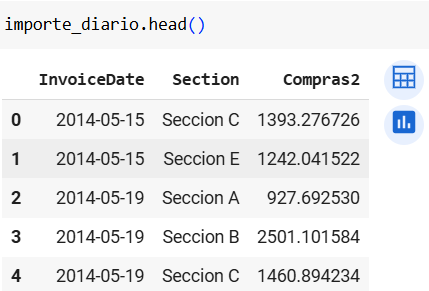

PARTE PROVEEDORES:Ranking de proveedores según el importe total comprado en un periodo de tiempo determinado y según el número de referencias o productos distintos comprados( proveedor importante al que se compran muchos productos distintos aunque de poco valor).

Para ello he creado una tabla de hechos llamdada tabla_proveedores y una granularidad de una fila por producto/s comprado/s por proveedor en un período determinado( he seleccionado por años) y su coste:

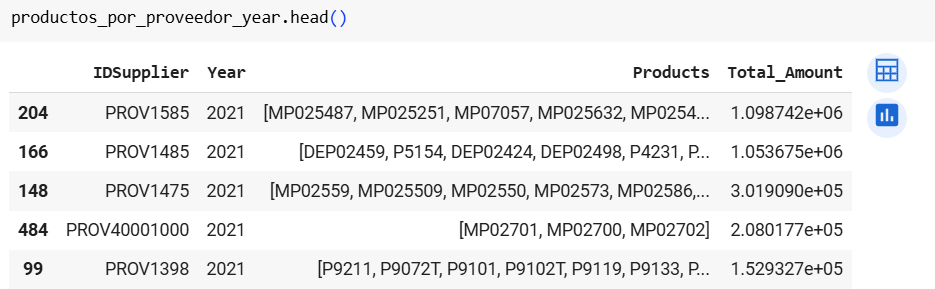


Las dimensiones serían 5:
- Date
- Currency
- Supplier
- Product
- Section